<a href="https://colab.research.google.com/github/ancka019/data_analysis-/blob/main/hw1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Найти пару-тройку наборов данных  и построить для них описательные статистики, ящики с усами и гистограммы распределения в Python.**

In [2]:
import pandas as pd 
import numpy as np
import os
import statistics

In [3]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [4]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace,hstack 
from pylab import plot,show,hist

In [15]:
AH =pd.read_csv('/content/raw_sales.csv', parse_dates=True,index_col = 'datesold')

In [ ]:
AH.head()

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


In [ ]:
print(AH.shape) 
print(len(AH))

(29580, 4)
29580


In [ ]:
AH.dtypes

postcode         int64
price            int64
propertyType    object
bedrooms         int64
dtype: object

In [ ]:
AH.describe(include='all')

,postcode,price,propertyType,bedrooms
count,29580.000000,2.958000e+04,29580,29580.000000
unique,NaN,NaN,2,NaN
top,NaN,NaN,house,NaN
freq,NaN,NaN,24552,NaN
mean,2730.249730,6.097363e+05,NaN,3.250169
std,146.717292,2.817079e+05,NaN,0.951275
min,2600.000000,5.650000e+04,NaN,0.000000
25%,2607.000000,4.400000e+05,NaN,3.000000
50%,2615.000000,5.500000e+05,NaN,3.000000
75%,2905.000000,7.050000e+05,NaN,4.000000


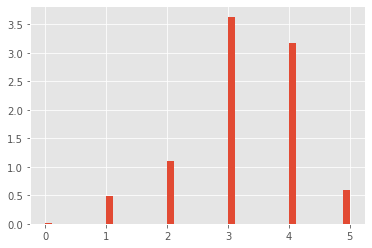

In [ ]:
AH['bedrooms'].hist(density= 1, bins=45 )

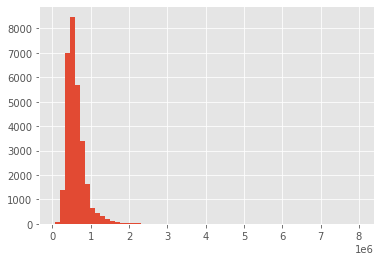

In [ ]:
AH['price'].hist(bins=60)

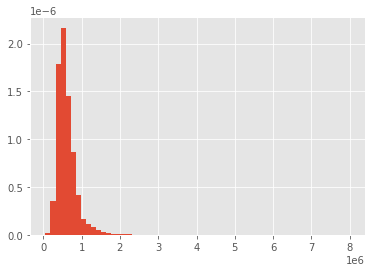

In [ ]:
AH['price'].hist(bins=60, density= 1)

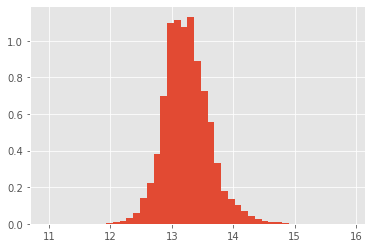

In [12]:
np.log(AH['price']).hist(bins=45, density=1);

In [ ]:
my_density = gaussian_kde(AH['price'])

(array([1.10461507e-06, 1.42572163e-07, 9.49062456e-09, 1.48955991e-09,
        2.97911982e-10, 2.12794273e-10, 8.51177091e-11, 0.00000000e+00,
        4.25588545e-11, 8.51177091e-11]),
 array([  56500.,  850850., 1645200., 2439550., 3233900., 4028250.,
        4822600., 5616950., 6411300., 7205650., 8000000.]),
 <a list of 10 Patch objects>)

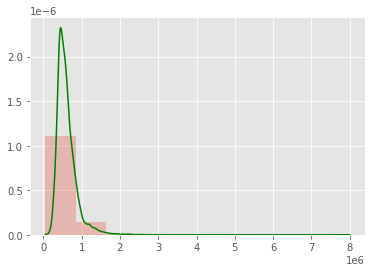

In [ ]:
x = linspace(min(AH['price']), max(AH['price']),1000) 
plot(x, my_density(x),'g') # distribution function
hist(AH['price'], density =1, alpha=.3) # histogram show()

(array([0.0020284 , 0.        , 0.11000676, 0.        , 0.24327248,
        0.        , 0.80682894, 0.        , 0.70601758, 0.13184584]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

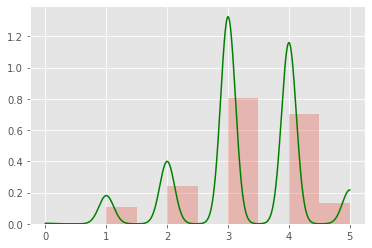

In [ ]:
my_density = gaussian_kde(AH['bedrooms'])
x = linspace(min(AH['bedrooms']), max(AH['bedrooms']),1000) 
plot(x, my_density(x),'g') # distribution function
hist(AH['bedrooms'], density =1, alpha=.3) # histogram show()

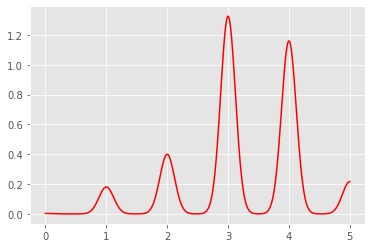

In [ ]:
plot(x, my_density(x),'r')

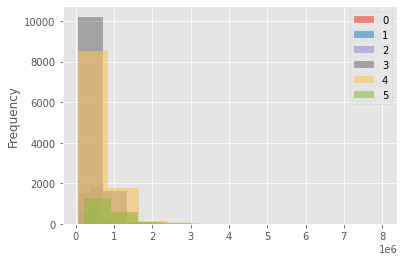

In [ ]:
AH.groupby('bedrooms')['price'].plot.hist(alpha=0.6)
plt.legend()

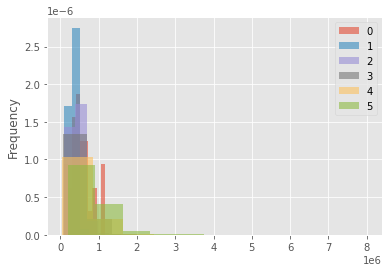

In [7]:
AH.groupby('bedrooms')['price'].plot.hist(density = 1, alpha=0.6) # Добавляем легенду
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

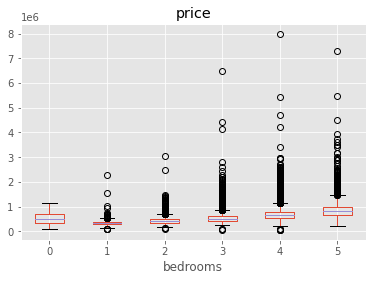

In [11]:
ax = AH.boxplot(column='price', by='bedrooms')
ax.get_figure().suptitle('')

In [21]:
df = pd.read_csv('/content/german_credit_data.csv', index_col= 0)

In [22]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [24]:
print(df.shape) 
print(len(df))

(1000, 9)
1000


In [26]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [27]:
df.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8
top,NaN,male,NaN,own,little,little,NaN,NaN,car
freq,NaN,690,NaN,713,603,274,NaN,NaN,337
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN


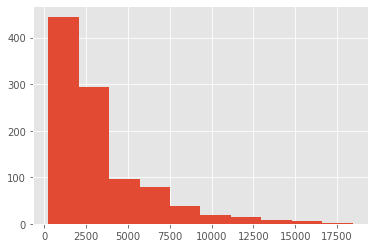

In [28]:
df['Credit amount'].hist()

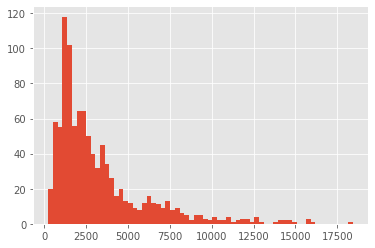

In [29]:
df['Credit amount'].hist(bins = 65)

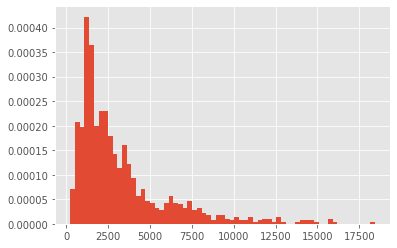

In [30]:
df['Credit amount'].hist(bins = 65, density= 1)

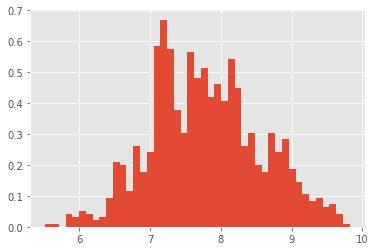

In [31]:
np.log(df['Credit amount']).hist(bins=45, density=1);

In [33]:
my_density = gaussian_kde(df['Credit amount'])

(array([2.44855288e-04, 1.61219324e-04, 5.33729504e-05, 4.40189281e-05,
        2.09089909e-05, 1.04544954e-05, 7.70331242e-06, 4.40189281e-06,
        2.75118301e-06, 5.50236602e-07]),
 array([  250. ,  2067.4,  3884.8,  5702.2,  7519.6,  9337. , 11154.4,
        12971.8, 14789.2, 16606.6, 18424. ]),
 <a list of 10 Patch objects>)

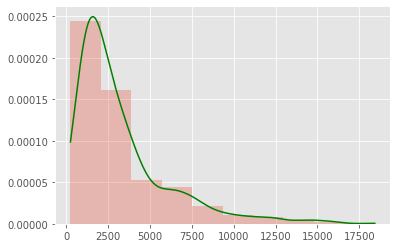

In [34]:
x = linspace(min(df['Credit amount']), max(df['Credit amount']),1000) 
plot(x, my_density(x),'g') # distribution function
hist(df['Credit amount'], density =1, alpha=.3) # histogram show()

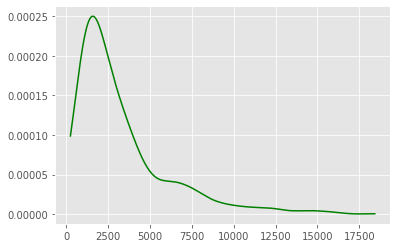

In [35]:
plot(x, my_density(x),'g')

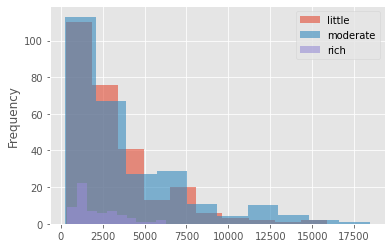

In [36]:
df.groupby('Checking account')['Credit amount'].plot.hist(alpha=0.6)
plt.legend()

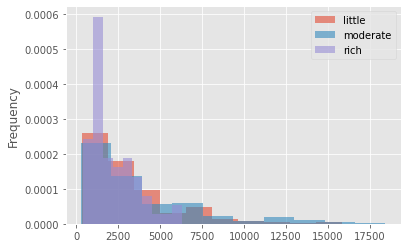

In [37]:
df.groupby('Checking account')['Credit amount'].plot.hist(density = 1, alpha=0.6)
plt.legend()

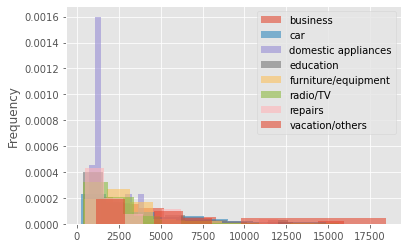

In [43]:
df.groupby('Purpose')['Credit amount'].plot.hist(density = 1, alpha=0.6)
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

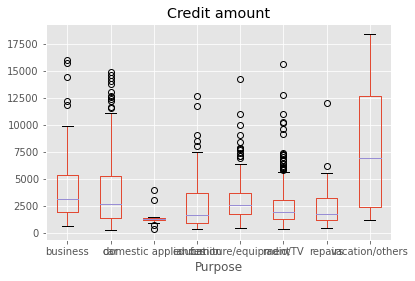

In [45]:
ax = df.boxplot(column='Credit amount', by='Purpose')
ax.get_figure().suptitle('')

In [47]:
print(df['Purpose'].value_counts())

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64


In [59]:
df2 = pd.read_csv('/content/supermarket_sales - Sheet1.csv', index_col= 0)

In [60]:
df2.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

In [62]:
print(df2.shape) 
print(len(df2))

(1000, 16)
1000


In [63]:
df2.dtypes

Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [64]:
df2.describe(include='all')

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
unique,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905e+00,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,6.220360e-14,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905e+00,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905e+00,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905e+00,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905e+00,22.445250,8.50000


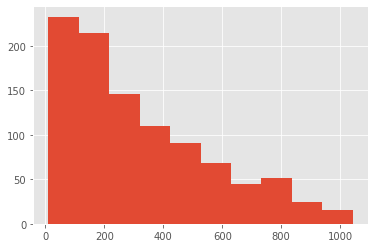

In [66]:
df2['Total'].hist()

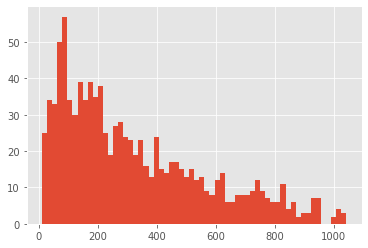

In [67]:
df2['Total'].hist(bins = 60)

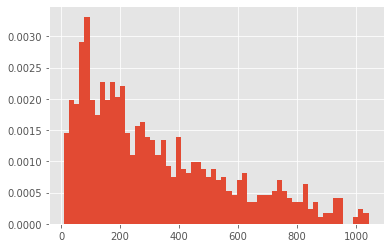

In [68]:
df2['Total'].hist(bins = 60, density = 1)

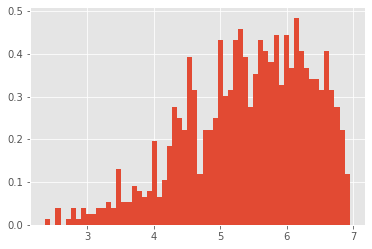

In [70]:
np.log(df2['Total']).hist(bins = 60, density = 1)

In [71]:
my_density = gaussian_kde(df2['Total'])

(array([0.00225781, 0.00208339, 0.00141477, 0.00106592, 0.00088181,
        0.00065893, 0.00043606, 0.0004942 , 0.00024225, 0.00015504]),
 array([  10.6785 ,  113.87565,  217.0728 ,  320.26995,  423.4671 ,
         526.66425,  629.8614 ,  733.05855,  836.2557 ,  939.45285,
        1042.65   ]),
 <a list of 10 Patch objects>)

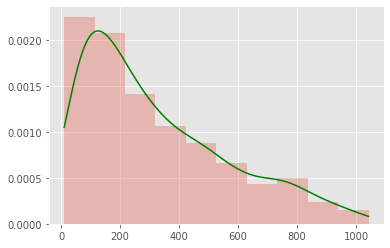

In [72]:
x = linspace(min(df2['Total']), max(df2['Total']),1000) 
plot(x, my_density(x),'g') # distribution function
hist(df2['Total'], density =1, alpha=.3)

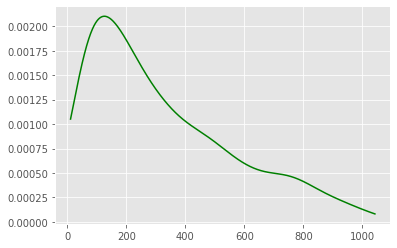

In [73]:
plot(x, my_density(x),'g')

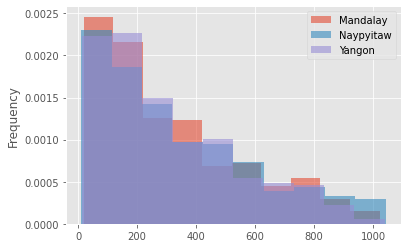

In [82]:
df2.groupby('City')['Total'].plot.hist(density =1,alpha=0.6)
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, '')

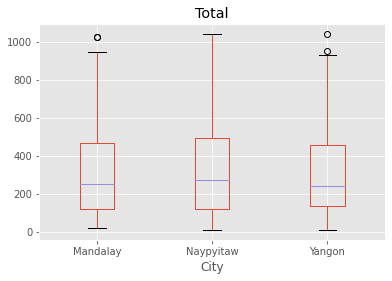

In [85]:
ax = df2.boxplot(column='Total', by='City')
# Хак для того, чтобы исправить наезжающие заголовки графика 
ax.get_figure().suptitle('')

In [86]:
print(df2['City'].value_counts())

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
